#### **Imports**

In [356]:
import scipy
from scipy.interpolate import BSpline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# For colors
colors = ['crimson','midnightblue', 'violet','orange','springgreen','dodgerblue','darkviolet', 'olive','tomato']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

#### **Exercise 1 (DustLog)**

In [357]:
df_DustLog = pd.read_csv('DustLog_forClass.dat', sep='\s+', header=None)
df_DustLog.columns = ['Depth', 'Logger']

In [358]:
f_linear = scipy.interpolate.interp1d(df_DustLog['Depth'],df_DustLog['Logger'],kind='linear')
f_cubic = scipy.interpolate.interp1d(df_DustLog['Depth'],df_DustLog['Logger'],kind='cubic')

x_new = np.arange(min(df_DustLog['Depth']),max(df_DustLog['Depth']),0.01)

smoothness = round( len(df_DustLog['Depth']) + np.sqrt(2*len(df_DustLog['Depth'])) ) # Get smoothness
tck = scipy.interpolate.splrep(df_DustLog['Depth'],df_DustLog['Logger'], s=smoothness)

y_smooth = BSpline(*tck)(x_new)
y_linear = f_linear(x_new)
y_cubic = f_cubic(x_new)

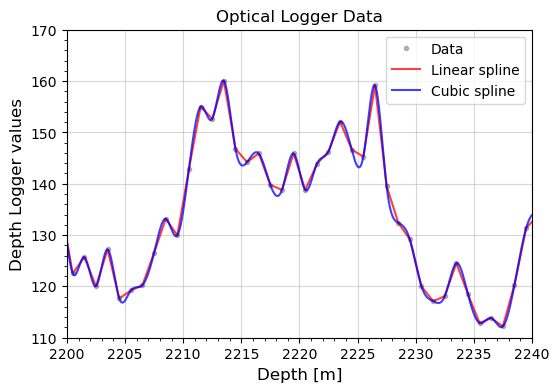

In [359]:
plt.figure(figsize=(6,4))

plt.plot(df_DustLog['Depth'],df_DustLog['Logger'],'o',alpha =0.25,markersize = 3,label='Data',color='black')
plt.plot(x_new,y_linear,alpha=0.75,label='Linear spline',color = 'red')
plt.plot(x_new,y_cubic,alpha=0.75,label='Cubic spline',color = 'blue')
#plt.plot(x_new,y_smooth,alpha=0.75,label=f'Smooth spline, s = {smoothness}',color = 'green')

ax = plt.gca() # For setting sub-ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=2, color='k')

plt.title('Optical Logger Data',fontsize=12)
plt.xlabel('Depth [m]',fontsize=12)
plt.ylabel('Depth Logger values',fontsize=12)
plt.grid(True,alpha=0.5,zorder=-10)
plt.xlim(2200,2240)
plt.ylim(110,170)
plt.legend()
plt.show()

#### **Exercise 2 (SplineCubic)**

In [360]:
df_Spline = pd.read_csv('SplineCubic.txt', sep='\s+', header=None)
df_Spline.columns = ['X', 'Y']

# df_Spline['Y'] = df_Spline['Y'] / (np.trapz(df_Spline['Y'],df_Spline['X']))

In [361]:
smoothness = round( len(df_Spline['X']) + np.sqrt(2*len(df_Spline['X'])) ) # Get smoothness
tck = scipy.interpolate.splrep(df_Spline['X'],df_Spline['Y'], s=smoothness) 

In [362]:
f_linear = scipy.interpolate.interp1d(df_Spline['X'],df_Spline['Y'],kind='linear')
f_quadr = scipy.interpolate.interp1d(df_Spline['X'],df_Spline['Y'],kind='quadratic')
f_cubic = scipy.interpolate.interp1d(df_Spline['X'],df_Spline['Y'],kind='cubic')

x_new = np.arange(min(df_Spline['X']),max(df_Spline['X']),0.001)

y_linear = f_linear(x_new) 
y_quadr = f_quadr(x_new)
y_cubic = f_cubic(x_new)
y_smooth = BSpline(*tck)(x_new)

### Normalize using np.sum (np.trapz is also good for integration)

y_linear = y_linear/np.sum(y_linear)
y_quadr = y_quadr/np.sum(y_quadr)
y_cubic = y_cubic/np.sum(y_cubic)
y_smooth = y_smooth/np.sum(y_smooth)

Compare integrals between 10^-5 to 0.1

In [363]:
for spline , data in zip(['linear','quadratic','cubic','smooth'],[y_linear,y_quadr,y_cubic,y_smooth]):
    integral = np.sum(data[0:11]) # np.trapz(data[0:11],x_new[0:11])
    
    print(f'For the range 10^-5 to 0.01 and {spline} spline, the integral is {integral:.05}') 

For the range 10^-5 to 0.01 and linear spline, the integral is 0.52896
For the range 10^-5 to 0.01 and quadratic spline, the integral is 0.65485
For the range 10^-5 to 0.01 and cubic spline, the integral is 0.67588
For the range 10^-5 to 0.01 and smooth spline, the integral is 0.67586


Compare integral from 0.03 to 0.1

In [364]:
for spline , data in zip(['linear','quadratic','cubic','smooth'],[y_linear,y_quadr,y_cubic,y_smooth]):
    integral = np.sum(data[30:101]) #np.trapz(data[30:101],x_new[30:101])
    print(f'For the range 0.03 to 0.1 and {spline} spline, the integral is {integral:.05}') 

For the range 0.03 to 0.1 and linear spline, the integral is 0.020984
For the range 0.03 to 0.1 and quadratic spline, the integral is -0.073697
For the range 0.03 to 0.1 and cubic spline, the integral is -0.052043
For the range 0.03 to 0.1 and smooth spline, the integral is -0.052061


Plotting of splines

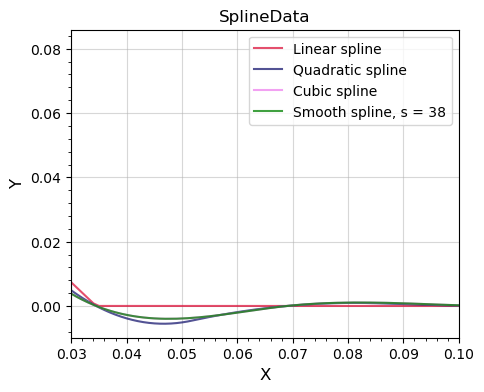

In [365]:
plt.figure(figsize=(5,4))

#plt.plot(df_Spline['X'],df_Spline['Y'],'o',alpha =0.7,markersize = 3,label='Data',color='black')
plt.plot(x_new,y_linear,alpha=0.75,label='Linear spline')
plt.plot(x_new,y_quadr,alpha=0.75,label='Quadratic spline')
plt.plot(x_new,y_cubic,alpha=0.75,label='Cubic spline')
plt.plot(x_new,y_smooth,alpha=0.75,label=f'Smooth spline, s = {smoothness}',color = 'green')


ax = plt.gca() # For setting sub-ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=2, color='k')

plt.title('SplineData',fontsize=12)
plt.xlabel('X',fontsize=12)
plt.ylabel('Y',fontsize=12)
plt.grid(True,alpha=0.5,zorder=-10)
plt.legend()
#plt.xlim(10**-5,0.01)
plt.xlim(0.03,0.1)
plt.show()

Smoothness can essentially 'overlook' noise by not enforcing the need to go through all points exactly. On another note, we typically do not go above cubic- or quadratic-order splines, since new structures can be interpolated between data points that are factually unsupported by the data.

#### **Exercise 3 (SplineOsc1)**

In [366]:
df_Osc = pd.read_csv('SplineOsc1.txt', sep='\s+', header=None)
df_Osc.columns = ['Energy', 'Probability']

In [367]:
smoothness = round( len(df_Osc['Energy'])) + np.sqrt(2*len(df_Osc['Energy'])) # Get smoothness

smoothness = 340

x_new = np.arange(df_Osc['Energy'].iloc[0],df_Osc['Energy'].iloc[-1],0.002)
tck = scipy.interpolate.splrep(df_Osc['Energy'],df_Osc['Probability'], s=smoothness)
y_smooth = BSpline(*tck)(x_new)

In [368]:
accepted_x , accepted_y = [] , []

for x , y in zip(x_new,y_smooth):
    if x < 1:
        accepted_x.append(x)
        accepted_y.append(y)
    else: pass

np.mean(accepted_y)

0.495765452530531

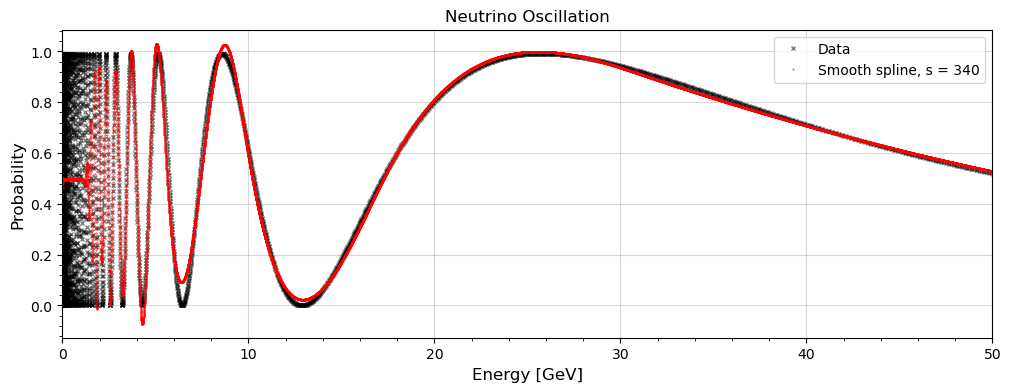

In [370]:
plt.figure(figsize=(12,4))

plt.plot(df_Osc['Energy'],df_Osc['Probability'],'x',alpha =0.5,markersize = 3,label='Data',color='black')
plt.plot(x_new,y_smooth,alpha=0.5,marker='x',markersize=1,label=f'Smooth spline, s = {smoothness}',linestyle='',color = 'red')

ax = plt.gca() # For setting sub-ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=2, color='k')

plt.title('Neutrino Oscillation',fontsize=12)
plt.xlabel('Energy [GeV]',fontsize=12)
plt.ylabel('Probability',fontsize=12)
plt.grid(True,alpha=0.5,zorder=-10)
plt.legend()
plt.xlim(0,50)
plt.show()